In [93]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.impute import SimpleImputer
from collections import Counter

In [5]:
data=pd.read_csv('train_titanic.csv')
test=pd.read_csv('test_titanic.csv')
test_ids = test["PassengerId"]

In [6]:
data.head()
# test.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [7]:
data.info()
data.isnull().sum()
data["Pclass"].value_counts()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


3    491
1    216
2    184
Name: Pclass, dtype: int64

In [37]:
data.isnull().sum().sort_values(ascending=False)

Cabin          687
Age            177
Embarked         2
PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
SibSp            0
Parch            0
Ticket           0
Fare             0
title            0
dtype: int64

In [45]:
data['Embarked'].value_counts(dropna=False)

S      644
C      168
Q       77
NaN      2
Name: Embarked, dtype: int64

Text(0.5, 1.0, 'Survival Probability by Gender')

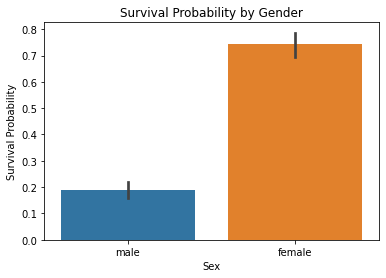

In [8]:
sns.barplot(x = 'Sex', y ='Survived', data = data)
plt.ylabel('Survival Probability')
plt.title('Survival Probability by Gender')

Text(0.5, 1.0, 'Survival Probability by Gender')

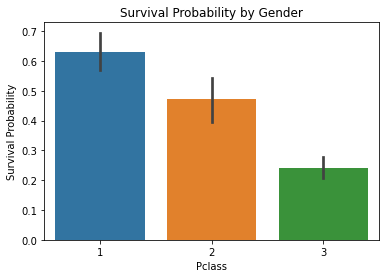

In [9]:
sns.barplot(x = 'Pclass', y ='Survived', data = data)
plt.ylabel('Survival Probability')
plt.title('Survival Probability by Gender')

<AxesSubplot:>

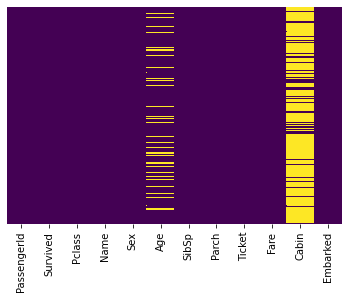

In [10]:
sns.heatmap(data.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [13]:
train_test_data=[data,test]
for dataset in train_test_data:
  dataset['title']=dataset['Name'].str.extract('([A-Za-z]+)\.',expand=False)

In [30]:
# Computing mean of survival WRT Pclass
data[['Sex','Survived']].groupby('Sex',as_index=False).mean().sort_values(by='Survived',ascending=False)

,Sex,Survived
0,female,0.742038
1,male,0.188908


In [76]:
data[['Sex','Survived','Pclass']].groupby(['Pclass','Sex'],as_index=False).mean().sort_values(by='Survived',ascending=False)

,Pclass,Sex,Survived
0,1,female,0.968085
2,2,female,0.921053
4,3,female,0.500000
1,1,male,0.368852
3,2,male,0.157407
5,3,male,0.135447


In [71]:
df=data[['Sex','Survived','Pclass','Embarked']].groupby(['Pclass','Sex'],as_index=False).mean()

Text(0.5, 1.0, 'Survival Probability by PClass & Sex')

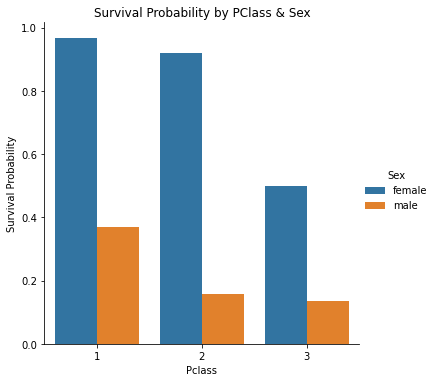

In [68]:
sns.catplot(x='Pclass', y='Survived', hue='Sex', data=df, kind='bar')
plt.ylabel('Survival Probability')
plt.title('Survival Probability by PClass & Sex')

In [81]:
##Catagorical Data 

In [83]:
data['Embarked'].value_counts(dropna=False)

S      644
C      168
Q       77
NaN      2
Name: Embarked, dtype: int64

In [87]:
data[['Survived','Embarked']].groupby(['Embarked'],as_index=False).mean().sort_values(by='Survived',ascending=False)

,Embarked,Survived
0,C,0.553571
1,Q,0.389610
2,S,0.336957


Text(0.5, 1.0, 'Survival Probability by Point of Embarkation')

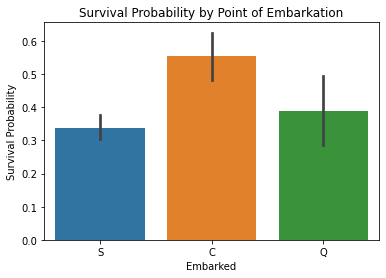

In [88]:
sns.barplot(x = 'Embarked', y ='Survived', data = data)
plt.ylabel('Survival Probability')
plt.title('Survival Probability by Point of Embarkation')

C:\Users\hasee\anaconda3\lib\site-packages\seaborn\categorical.py:3714: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
C:\Users\hasee\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


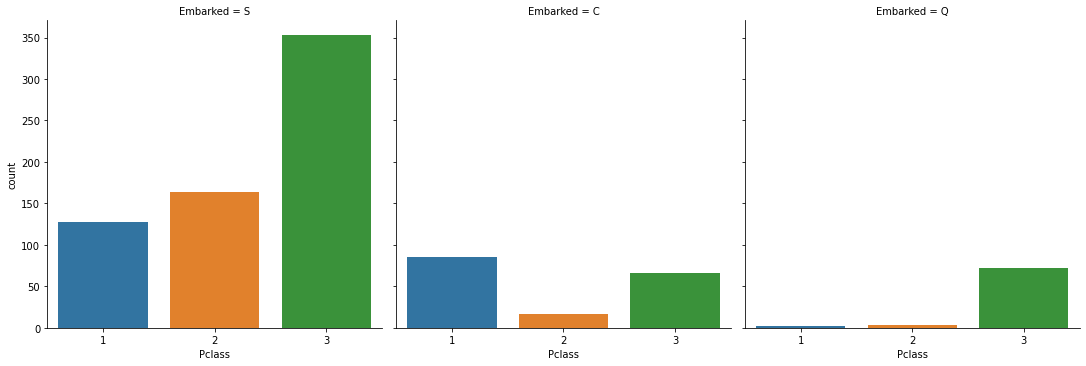

In [89]:
sns.factorplot('Pclass',col='Embarked',data=data,kind='count')

C:\Users\hasee\anaconda3\lib\site-packages\seaborn\axisgrid.py:316: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)
C:\Users\hasee\anaconda3\lib\site-packages\seaborn\axisgrid.py:643: UserWarning: Using the pointplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)
C:\Users\hasee\anaconda3\lib\site-packages\seaborn\axisgrid.py:648: UserWarning: Using the pointplot function without specifying `hue_order` is likely to produce an incorrect plot.
  warnings.warn(warning)


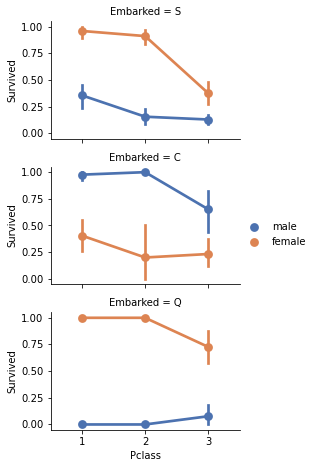

In [90]:
# Survival probability by all categorical variables

grid = sns.FacetGrid(data, row = 'Embarked', size = 2.2, aspect = 1.6)
grid.map(sns.pointplot, 'Pclass', 'Survived', 'Sex', palette = 'deep')
grid.add_legend()

In [78]:
data[['Sex','Survived','Pclass','Embarked']].groupby(['Embarked','Pclass','Sex'],as_index=False).mean().sort_values(by='Survived',ascending=False)

,Embarked,Pclass,Sex,Survived
2,C,2,female,1.000000
6,Q,1,female,1.000000
8,Q,2,female,1.000000
0,C,1,female,0.976744
12,S,1,female,0.958333
14,S,2,female,0.910448
10,Q,3,female,0.727273
4,C,3,female,0.652174
1,C,1,male,0.404762
16,S,3,female,0.375000


In [ ]:
# Detect and remove outliers in numerical variables

In [94]:
def detect_outliers(df, n, features):
    """"
    This function will loop through a list of features and detect outliers in each one of those features. In each loop, a data point is deemed an outlier if it is less than the first quartile minus the outlier step or exceeds third quartile plus the outlier step. The outlier step is defined as 1.5 times the interquartile range. Once the outliers have been determined for one feature, their indices will be stored in a list before proceeding to the next feature and the process repeats until the very last feature is completed. Finally, using the list with outlier indices, we will count the frequencies of the index numbers and return them if their frequency exceeds n times.    
    """
    outlier_indices = [] 
    for col in features: 
        Q1 = np.percentile(df[col], 25)
        Q3 = np.percentile(df[col], 75)
        IQR = Q3 - Q1
        outlier_step = 1.5 * IQR 
        outlier_list_col = df[(df[col] < Q1 - outlier_step) | (df[col] > Q3 + outlier_step)].index
        outlier_indices.extend(outlier_list_col) 
    outlier_indices = Counter(outlier_indices)
    multiple_outliers = list(key for key, value in outlier_indices.items() if value > n) 
    return multiple_outliers

outliers_to_drop = detect_outliers(data, 2, ['Age', 'SibSp', 'Parch', 'Fare'])
print("We will drop these {} indices: ".format(len(outliers_to_drop)), outliers_to_drop)

We will drop these 10 indices:  [27, 88, 159, 180, 201, 324, 341, 792, 846, 863]


In [95]:
# Outliers in numerical variables

data.loc[outliers_to_drop, :]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,title
27,28,0,1,"Fortune, Mr. Charles Alexander",male,19.0,3,2,19950,263.00,C23 C25 C27,S,Mr
88,89,1,1,"Fortune, Miss. Mabel Helen",female,23.0,3,2,19950,263.00,C23 C25 C27,S,Miss
159,160,0,3,"Sage, Master. Thomas Henry",male,NaN,8,2,CA. 2343,69.55,NaN,S,Master
180,181,0,3,"Sage, Miss. Constance Gladys",female,NaN,8,2,CA. 2343,69.55,NaN,S,Miss
201,202,0,3,"Sage, Mr. Frederick",male,NaN,8,2,CA. 2343,69.55,NaN,S,Mr
324,325,0,3,"Sage, Mr. George John Jr",male,NaN,8,2,CA. 2343,69.55,NaN,S,Mr
341,342,1,1,"Fortune, Miss. Alice Elizabeth",female,24.0,3,2,19950,263.00,C23 C25 C27,S,Miss
792,793,0,3,"Sage, Miss. Stella Anna",female,NaN,8,2,CA. 2343,69.55,NaN,S,Miss
846,847,0,3,"Sage, Mr. Douglas Bullen",male,NaN,8,2,CA. 2343,69.55,NaN,S,Mr
863,864,0,3,"Sage, Miss. Dorothy Edith ""Dolly""",female,NaN,8,2,CA. 2343,69.55,NaN,S,Miss


In [ ]:
#  This step will delete all the irrelevant data columns from the set. For e.g. ["Ticket","Cabin","Name","PassengerId"]
# It will also replace the numerical data with a median value */

In [ ]:
# def clean(data):
#   data=data.drop(["Ticket","Cabin","Name","PassengerId"],axis=1)
#   cols=["SibSp","Parch","Fare","Age"]
#   for i in cols:
#     data[i].fillna(data[i].median(),inplace=True)
#   data.Embarked.fillna("U",inplace=True)
#   return data

# data=clean(data)
# test=clean(test)

In [62]:
data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [64]:
# test=test.drop("Survived",axis=1)

In [ ]:
data=data.drop(["Ticket","Cabin","Name","PassengerId"],axis=1)
test=test.drop(["Ticket","Cabin","Name","PassengerId"],axis=1)
data.Embarked.fillna("U",inplace=True)
test.Embarked.fillna("U",inplace=True)

In [ ]:
test.info()

In [ ]:
data.info()

In [ ]:
from sklearn.impute import SimpleImputer
imputer=SimpleImputer(missing_values=np.nan,strategy='mean')
imputer.fit(data.iloc[:,[0,1,3,4,5,6]])
data.iloc[:,[0,1,3,4,5,6]]=imputer.transform(data.iloc[:,[0,1,3,4,5,6]])

imputertest=SimpleImputer(missing_values=np.nan,strategy='mean')
imputertest.fit(test.iloc[:,[0,2,3,4,5]])
test.iloc[:,[0,2,3,4,5]]=imputertest.transform(test.iloc[:,[0,2,3,4,5]])

In [ ]:
(test['Age'].isnull()).sum()

In [ ]:
# This code will change the data from string into numbers. For e.g. male is 1 and female is 0 under Column "Sex".

# from sklearn import preprocessing
# le=preprocessing.LabelEncoder()

# cols=["Sex","Embarked"]

# for col in cols:
#   data[col]=le.fit_transform(data[col])
  
#   test[col]=le.transform(test[col])
#   print(le.classes_)

# # data.head(5)
# test.head(5)

In [ ]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder

ct=ColumnTransformer(transformers=[('encoder',OneHotEncoder(),[2])],remainder='passthrough')
data=ct.fit_transform(data)

In [ ]:
print(data)

In [ ]:
### 3. Splitting the training set data into test and train 
 
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
 
y=data["Survived"]
X=data.drop("Survived",axis=1)
 
X_train, X_val,y_train,y_val=train_test_split(X,y,test_size=0.2,random_state=42)

In [ ]:
clf=LogisticRegression(random_state=0,max_iter=1000).fit(X_train,y_train)

In [ ]:
 predictions=clf.predict(X_val)
 from sklearn.metrics import accuracy_score
 accuracy_score(y_val,predictions)

In [ ]:
submission_preds=clf.predict(test)

In [ ]:
df = pd.DataFrame({"PassengerId": test_ids.values,
                   "Survived": submission_preds,
                  })

In [ ]:
df.to_csv("submission.csv", index=False)